**<H1> Suicide Rate Trend Analysis**

The given dataset includes the following parameters:
* Country
* Year
* Sex
* Age
* Number of suicides
* Population
* Country-year
* HDI for year
* GDP for year
* GDP per capita
* Generation

**<h2> Importing the Libraries**

In [1]:
#Import Of Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter("ignore")

**<h2> Uploading Dataset**

The below command is used to upload the required dataset from one's computer. It then transforms it into a dataframe.We do this in order to interact with the data effectively. The dataframe will be made accessible by variable data.

In [3]:
data=pd.read_csv('master.csv')

In [4]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
data.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

The next line helps display the variable type 

In [6]:
data.dtypes

country               object
year                   int64
sex                   object
age                   object
suicides_no            int64
population             int64
suicides/100k pop    float64
country-year          object
HDI for year         float64
 gdp_for_year         object
gdp_per_capita         int64
generation            object
dtype: object

Next line gives us a concise summary of the dataframe.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country              27820 non-null object
year                 27820 non-null int64
sex                  27820 non-null object
age                  27820 non-null object
suicides_no          27820 non-null int64
population           27820 non-null int64
suicides/100k pop    27820 non-null float64
country-year         27820 non-null object
HDI for year         8364 non-null float64
 gdp_for_year        27820 non-null object
gdp_per_capita       27820 non-null int64
generation           27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


**<h2> Exploratory Data Analysis**

In [8]:
#Data Cleaning
data["gdp_for_year"]=data[" gdp_for_year"]#removing the space before the name

In [9]:
data.drop(" gdp_for_year",axis=1,inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country              27820 non-null object
year                 27820 non-null int64
sex                  27820 non-null object
age                  27820 non-null object
suicides_no          27820 non-null int64
population           27820 non-null int64
suicides/100k pop    27820 non-null float64
country-year         27820 non-null object
HDI for year         8364 non-null float64
gdp_per_capita       27820 non-null int64
generation           27820 non-null object
gdp_for_year         27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB




gdp_for_year is numerical feature, but due to comma seperated number it is stored as string


In [11]:
data["gdp_for_year"]=data.gdp_for_year.str.replace(",","")

In [12]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_per_capita,generation,gdp_for_year
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,796,Generation X,2156624900
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,796,Silent,2156624900
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,796,Generation X,2156624900
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,796,G.I. Generation,2156624900
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,796,Boomers,2156624900


In [13]:
data["gdp_for_year"]=data["gdp_for_year"].astype(float)

In [14]:
data.shape

(27820, 12)

In [15]:
data.isnull().sum()

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides/100k pop        0
country-year             0
HDI for year         19456
gdp_per_capita           0
generation               0
gdp_for_year             0
dtype: int64

**<h3>Count Plot for Generations**

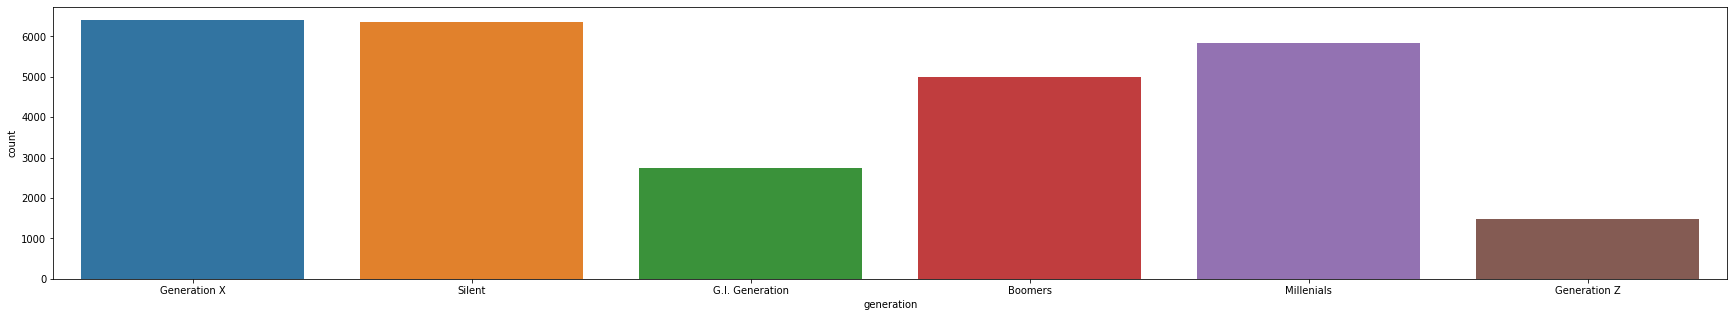

In [16]:
plt.figure(figsize=(30,5))
sns.countplot(data['generation'])

**<h2> Label Encoding**

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder1=LabelEncoder()
data["sex"]=label_encoder1.fit_transform(data["sex"])

In [18]:
label_encoder2=LabelEncoder()
data["generation"]=label_encoder2.fit_transform(data["generation"])

In [19]:
data=data.fillna(0)

In [20]:
data.drop(columns=["country","country-year","age"],axis=1,inplace=True)

In [21]:
data.head()

,year,sex,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita,generation,gdp_for_year
0,1987,1,21,312900,6.71,0.0,796,2,2.156625e+09
1,1987,1,16,308000,5.19,0.0,796,5,2.156625e+09
2,1987,0,14,289700,4.83,0.0,796,2,2.156625e+09
3,1987,1,1,21800,4.59,0.0,796,1,2.156625e+09
4,1987,1,9,274300,3.28,0.0,796,0,2.156625e+09


**<h3> Comparing Number of Suicides Between Both the Sexes**

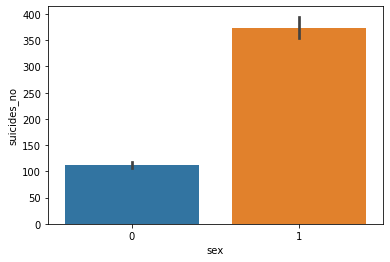

In [22]:
sns.barplot(x='sex',y='suicides_no',data=data)

**<h3>GDP trend over the given years**

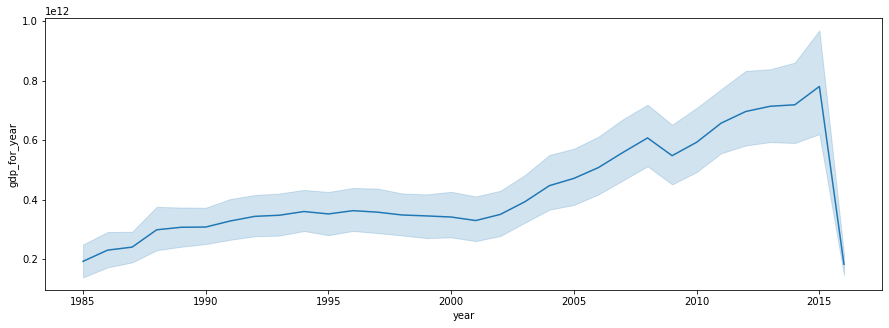

In [23]:
plt.figure(figsize=(15,5))
sns.lineplot(x='year',y='gdp_for_year',data=data)

**<h3> Suicide rate over the given period between both the genders**

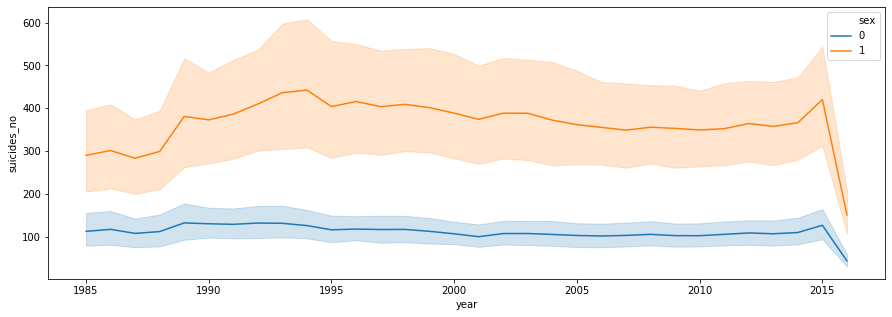

In [24]:
plt.figure(figsize=(15,5))
sns.lineplot(x='year',y='suicides_no',hue='sex',data=data)

In [25]:
data.dtypes

year                   int64
sex                    int32
suicides_no            int64
population             int64
suicides/100k pop    float64
HDI for year         float64
gdp_per_capita         int64
generation             int32
gdp_for_year         float64
dtype: object

**<h3>Using Correlation heatmap to find important features and their relations with other features.**

In [26]:
#Correlation Matrix
data.corr()

,year,sex,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita,generation,gdp_for_year
year,1.000000,0.000000e+00,-0.004546,0.008850,-0.039037,3.431898e-01,3.391343e-01,2.683006e-01,9.452857e-02
sex,0.000000,1.000000e+00,0.144629,-0.011242,0.391496,3.061582e-18,1.336263e-18,-4.145525e-19,-7.757932e-19
suicides_no,-0.004546,1.446292e-01,1.000000,0.616162,0.306604,-1.730773e-02,6.132975e-02,-7.062371e-02,4.300959e-01
population,0.008850,-1.124208e-02,0.616162,1.000000,0.008285,9.374731e-03,8.150986e-02,-6.796261e-02,7.106973e-01
suicides/100k pop,-0.039037,3.914965e-01,0.306604,0.008285,1.000000,-2.290278e-02,1.785134e-03,-4.982007e-02,2.523964e-02
HDI for year,0.343190,3.061582e-18,-0.017308,0.009375,-0.022903,1.000000e+00,2.165182e-01,4.865837e-02,7.375306e-02
gdp_per_capita,0.339134,1.336263e-18,0.061330,0.081510,0.001785,2.165182e-01,1.000000e+00,8.289921e-02,3.034045e-01
generation,0.268301,-4.145525e-19,-0.070624,-0.067963,-0.049820,4.865837e-02,8.289921e-02,1.000000e+00,2.125070e-02
gdp_for_year,0.094529,-7.757932e-19,0.430096,0.710697,0.025240,7.375306e-02,3.034045e-01,2.125070e-02,1.000000e+00


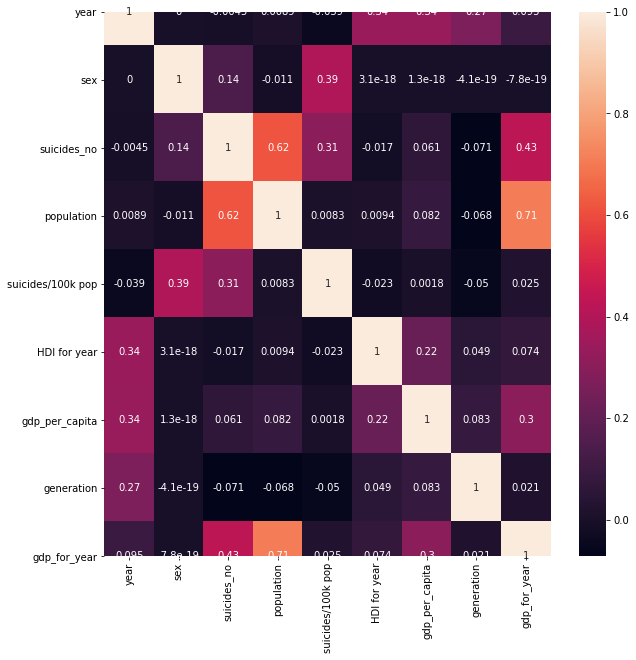

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [28]:
#Train and Test Data
train=data.drop("suicides_no",axis=1)
test=data["suicides_no"]

**<h3> Density Plot for population**

In [29]:
sns.set_style('whitegrid') 	

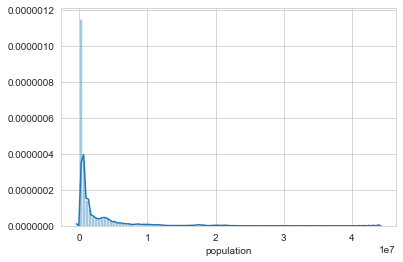

In [30]:
sns.distplot(train['population'],bins=100)

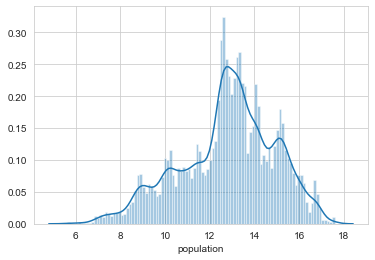

In [31]:
sns.distplot(np.log(train['population']),bins=100)

**<h3> Studying Trends between Year and Suicide Numbers**

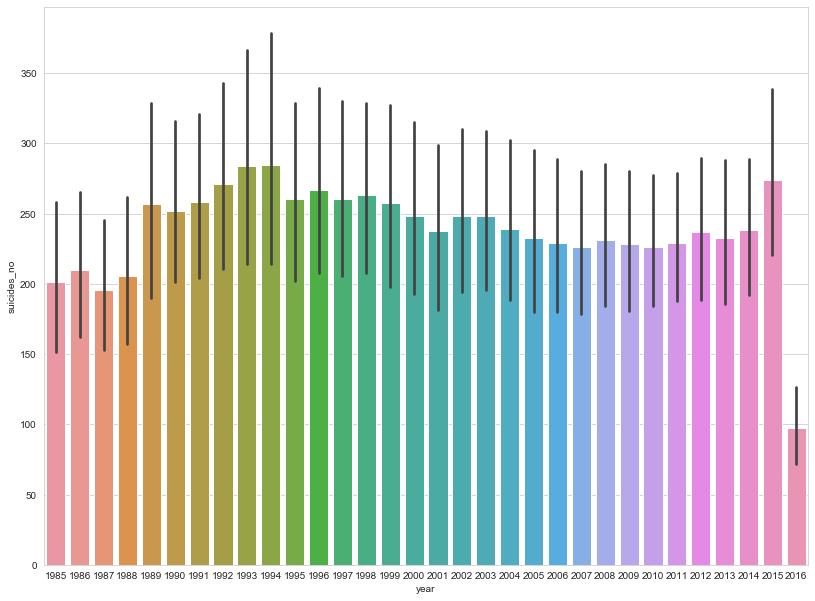

In [32]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(13.7, 10.27)
sns.barplot(x='year',y='suicides_no',data=data,ax=ax)

**<h3> Studying Trends between Year and Population**

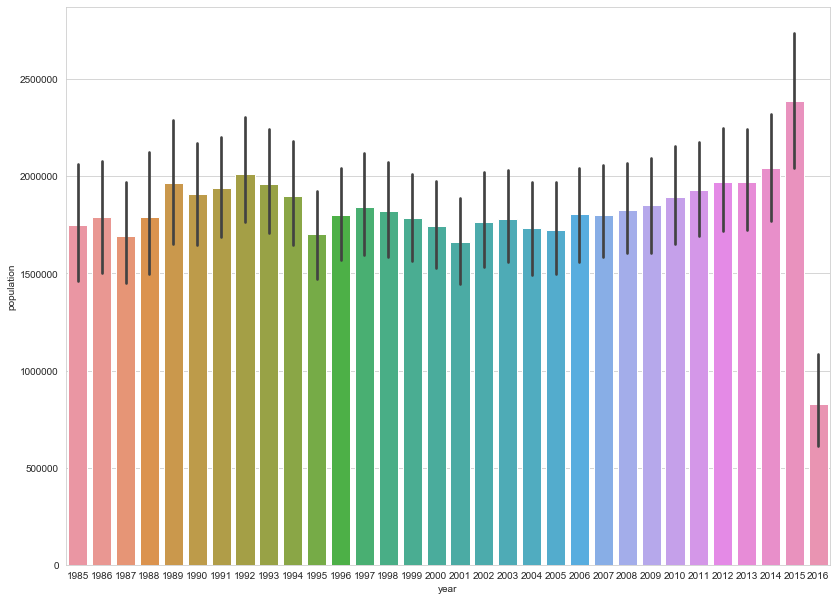

In [33]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(13.7, 10.27)
sns.barplot(x='year',y='population',data=train) 	

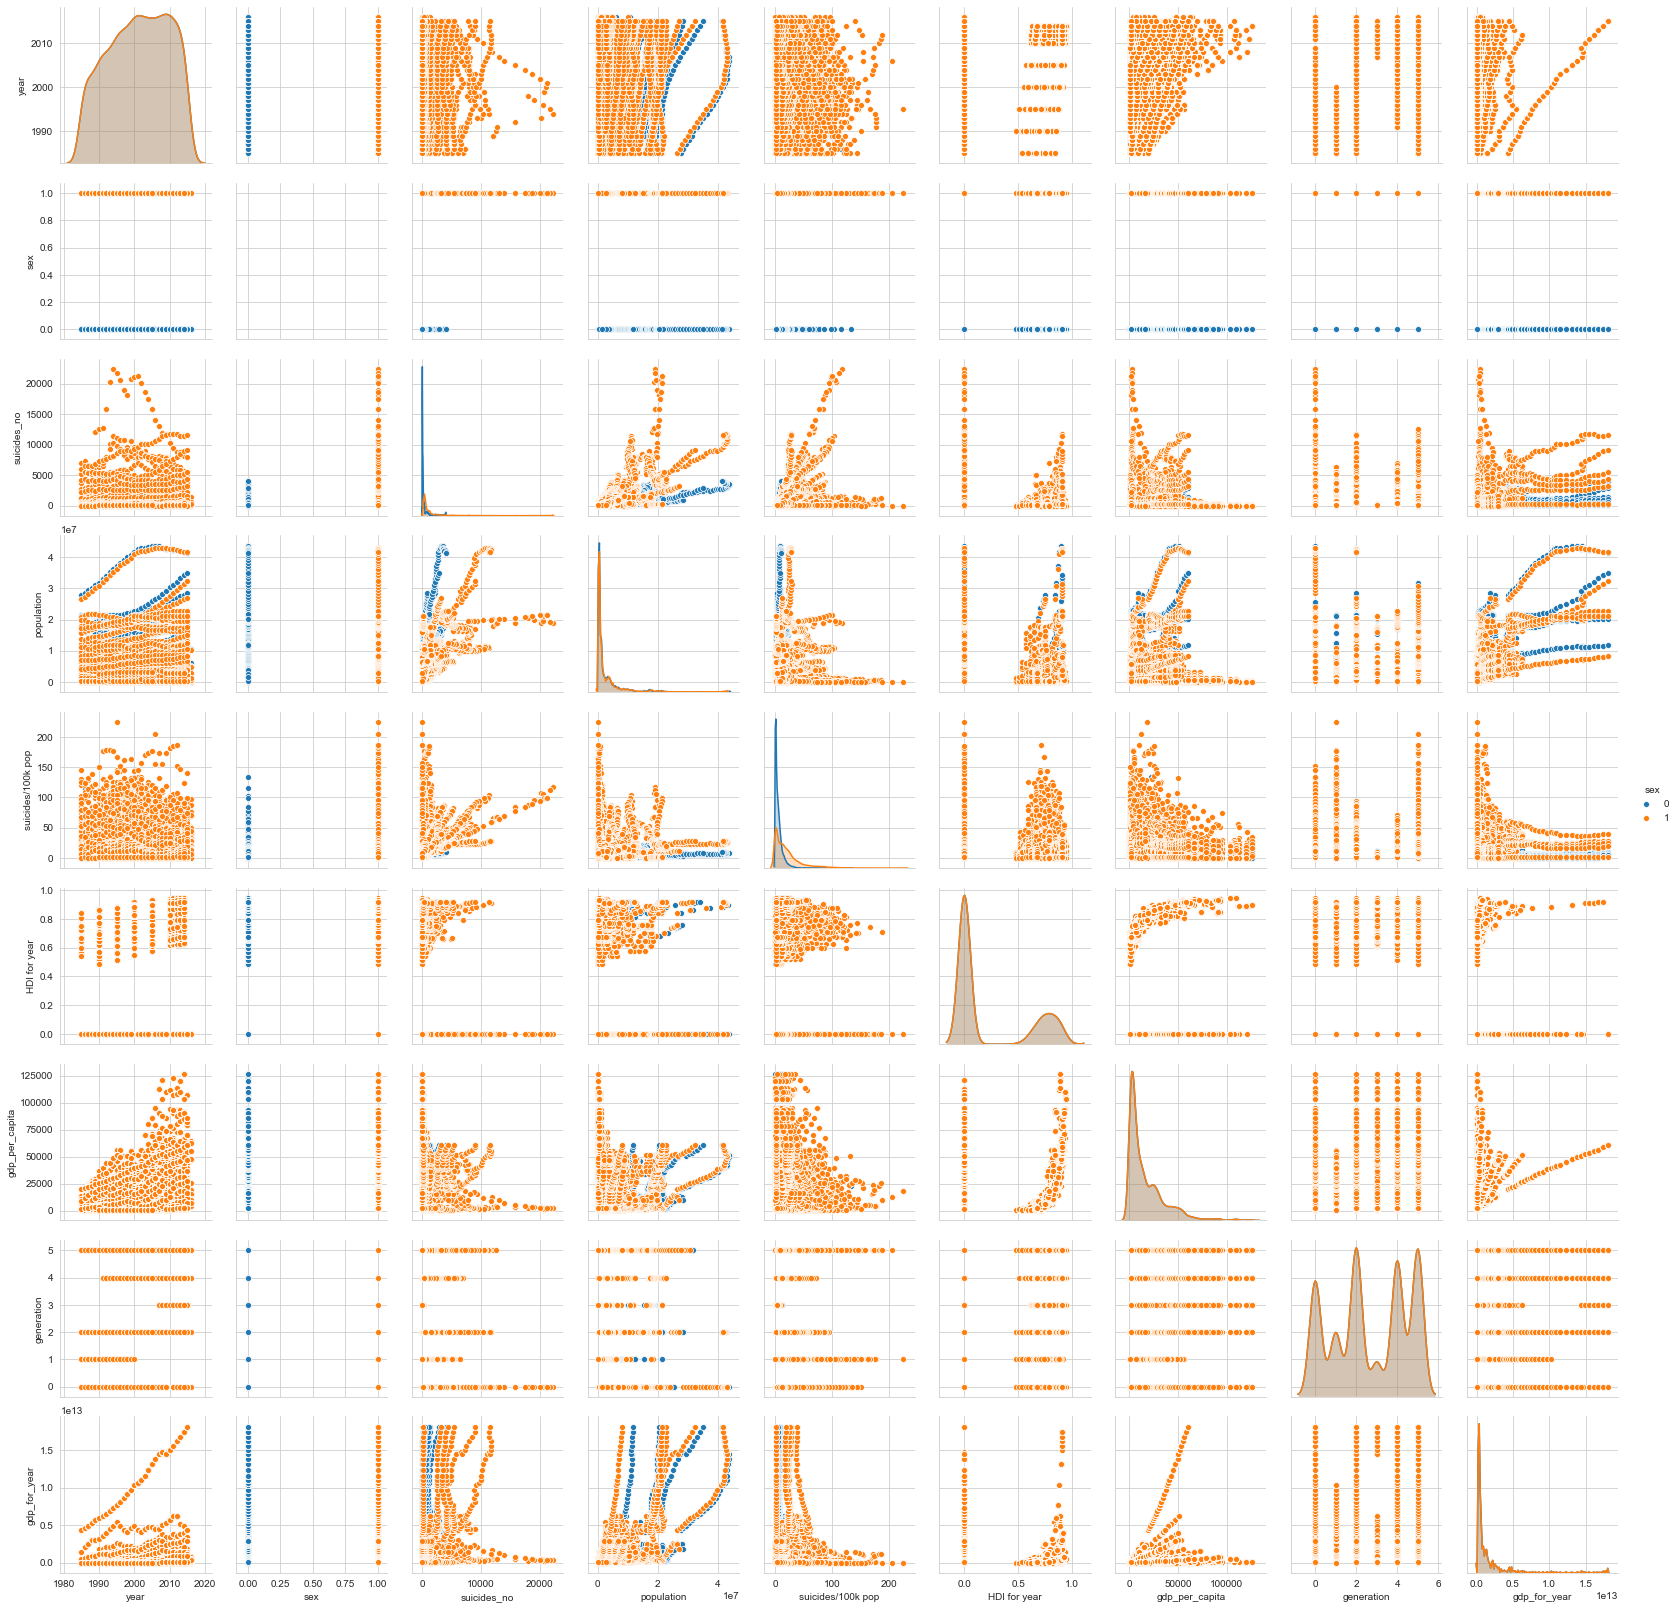

In [34]:
#Analysis Of all feautres 
sns.pairplot(data,hue="sex")

**<h2> Machine Learning Model**

**<h3> Splitting Training and Test Data**

We import model selection from sklearn to split the data into the training and test sets.

In [35]:
#Library for Training Model
from sklearn import model_selection

In [36]:
#Train Test Split
x_train,x_test,y_train,y_test=model_selection.train_test_split(train,test)

**<h3> Importing Algorithms**

The following algorithms will be tested on the given dataset and the one with the best performance would be declared suitable:
* Random Forest
* Decision Tree
* Linear Regression
* Support Vector Regression


In [37]:
#Training will be done by RandomForest Algorithm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

**<h4> Testing on Random Forest Regressor**

Given Estimators are 50 and the criterion being used is Mean Squared Error.

In [38]:
alg1=RandomForestRegressor(n_estimators=50,random_state=0,criterion="mse")
alg1.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

**<h4> Testing on Decision Tree Regressor**



In [39]:
alg2=DecisionTreeRegressor()
alg2.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

**<h4> Testing on Linear Regressor**

In [40]:
alg3=LinearRegression()
alg3.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**<h4> Testing on Support Vector Regressor**

In [41]:
alg4=SVR()
alg4.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

**<h4> Predicting the y values from our given models**

In [42]:
#Prediction
y_pred_1=alg1.predict(x_test)
y_pred_2=alg2.predict(x_test)
y_pred_3=alg3.predict(x_test)
y_pred_4=alg4.predict(x_test)

**<h4> Calculating and Printing the accuracy**

In [43]:
from sklearn import metrics

In [44]:
print("Random Forest RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred_1)))
print("Decesion Tree RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred_2)))
print("Linear Regression RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred_3)))
print("SVR RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred_4)))

Random Forest RMSE: 72.73443429129736
Decesion Tree RMSE: 70.47697514706957
Linear Regression RMSE: 714.1483785074441
SVR RMSE: 957.4238679867643


In [57]:
y_pred_1.astype(int)

array([162,  31,   0, ...,   5,   0,  29])

In [55]:
y_test

7125     164
22419     31
15448      0
11514    211
15089     18
        ... 
25632      4
19853     11
17998      6
21828      0
22861     30
Name: suicides_no, Length: 6955, dtype: int64